## SVM Checker

In [3]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import scipy.ndimage as ndimage



def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.gaussian(1))
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    Z2 = ndimage.gaussian_filter(Z, sigma=1.0, order=0)
        
    plt.contourf(
        xx, yy, Z2,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[-0.90613531 -0.65386137]
 [ 0.73437338  0.26090251]
 [-0.90561475 -0.02444285]
 [ 0.67583392  1.07019092]
 [ 0.99980651  0.09857555]
 [-0.93960364 -0.63499889]
 [-0.72774482  0.1148108 ]
 [ 2.05410291  1.1028649 ]
 [-1.26432783 -0.17414327]
 [-1.17928042  0.90257301]]
     pcost       dcost       gap    pres   dres
 0: -1.6086e+00 -4.2981e+00  3e+00  6e-17  1e+00
 1: -1.7404e+00 -2.0055e+00  3e-01  2e-16  2e-01
 2: -1.8255e+00 -1.8636e+00  4e-02  3e-16  2e-02
 3: -1.8470e+00 -1.8508e+00  4e-03  2e-16  1e-03
 4: -1.8482e+00 -1.8483e+00  4e-05  3e-16  1e-05
 5: -1.8483e+00 -1.8483e+00  4e-07  2e-16  1e-07
 6: -1.8483e+00 -1.8483e+00  4e-09  2e-16  1e-09
Optimal solution found.


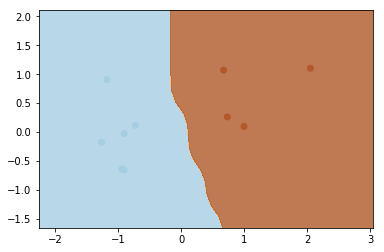

In [4]:
example()